<a href="https://colab.research.google.com/github/sam1610/Projects/blob/master/23_06_2021_Nb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip  install -U   scikit-learn  random_timestamp ipywidgets plotly_express

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.7/dist-packages (0.24.2)
Requirement already up-to-date: random_timestamp in /usr/local/lib/python3.7/dist-packages (1.1)
Requirement already up-to-date: ipywidgets in /usr/local/lib/python3.7/dist-packages (7.6.3)
Requirement already up-to-date: plotly_express in /usr/local/lib/python3.7/dist-packages (0.4.1)


In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls  /content/drive/MyDrive/portalAnalysis/

Data  TimeSeriesAnalysisWithPython


In [ ]:
cd /content/drive/MyDrive/portalAnalysis/

/content/drive/.shortcut-targets-by-id/1ZqnixmkqoSThWVJbij6rwHF3MnJGRihq/portalAnalysis


## Student's General Info. Dataset

In [ ]:
import pandas as pd
import numpy as np
import random
import string
from random import randint
import matplotlib.pyplot as plt
 

In [ ]:
## الصفوف العينة هي : من الصف الأول الابتدائي و حتى الثالث الاعدادي

grades={
    "06":"9","07":"8",
    "08":"7", "09":"6", "10":"5", "11":"4",
    "12":"3", "13":"2", "14":"1"
}

In [ ]:
###  الطلبة العينة من 10 مدارس عشوائيًا (500 طالب) ##

list_std=[]
for i in range(500):
  birth_year=random.choice(["06", "07", "08", "09","10","11","12","13","14"])
  student= {
  "student_id": ''.join(random.choice(string.digits) for _ in range(5)) ,
  "birth_year": birth_year,
  "birth_month": random.choice(["01", "02", "03", "04", "05", 
                                "06", "07", "08", "09","10","11","12"]),
  "school": random.choice([ "Sc_"+str(j) for j in range(10)]),
  #"Course_code": random.choice([ "Course_"+str(i) for i in range(10)]),
  "grade": grades[birth_year],  #int((9*np.random.rand(1)+1)),
  "gender": random.choice(["M", "F"]),
  "governorate": random.choice(["North", "South", "Caiptal", "Muharraq"])
         } 
  list_std.append(student)
  # for k in range(6):
      
df_st=pd.DataFrame(list_std)


In [ ]:
df_st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   student_id   500 non-null    object
 1   birth_year   500 non-null    object
 2   birth_month  500 non-null    object
 3   school       500 non-null    object
 4   grade        500 non-null    object
 5   gender       500 non-null    object
 6   governorate  500 non-null    object
dtypes: object(7)
memory usage: 27.5+ KB


In [ ]:

df_st.head()

,student_id,birth_year,birth_month,school,grade,gender,governorate
0,67607,08,10,Sc_6,7,F,South
1,38838,14,09,Sc_2,1,M,Muharraq
2,84462,07,10,Sc_0,8,F,North
3,26849,09,09,Sc_0,6,F,North
4,66150,14,12,Sc_4,1,M,North


In [ ]:
df_st[:-1].values.T

array([['67607', '38838', '84462', ..., '63705', '08564', '69396'],
       ['08', '14', '07', ..., '07', '12', '10'],
       ['10', '09', '10', ..., '07', '02', '07'],
       ...,
       ['7', '1', '8', ..., '8', '3', '5'],
       ['F', 'M', 'F', ..., 'F', 'F', 'M'],
       ['South', 'Muharraq', 'North', ..., 'North', 'Muharraq',
        'Caiptal']], dtype=object)

In [ ]:
df_st.insert(0, 'student_ID', df_st['birth_year'].astype(str) + df_st['birth_month'].astype(str)+df_st.pop('student_id').astype(str))

In [ ]:
df_st.head()

,student_ID,birth_year,birth_month,school,grade,gender,governorate
0,081067607,08,10,Sc_6,7,F,South
1,140938838,14,09,Sc_2,1,M,Muharraq
2,071084462,07,10,Sc_0,8,F,North
3,090926849,09,09,Sc_0,6,F,North
4,141266150,14,12,Sc_4,1,M,North


In [ ]:
df_st.to_csv("./Data/Edited-Students.csv")

##Students' portal activity dataset

In [ ]:
#df_st=pd.read_csv("./Data/Edited-Students.csv", index_col=0)




##   Achivements Reports

In [ ]:
from random_timestamp import random_timestamp
list=[]
for i, k  in zip(df_st.student_ID, df_st.grade):
  for j in range (1, int((20*np.random.rand()+8))):
    course_id=random.choice(["g"+str(k)+"_"+str(l) for l in range(1,7)])
    ActType=random.choice(["1", "0" ])
    activities= {
        "student_ID": i ,
        "Course_code":course_id,  
        "Activity_id": f"{course_id}-Act_{int(20*np.random.rand()+1)}",
        "Activity_type":ActType,
        # "Act_count": course_ref[course_id][ActType] , #np.random.randint(5,30),

      "Unit_id":  random.choice([ "Un_"+str(k) for k in range(10)]),
      "Chapter_id": random.choice([ "Chp_"+str(k) for k in range(10)]), 
      "Lesson_id": random.choice([ "Ls_"+str(k) for k in range(10)]),
      # "Competence-id":  random.choice([ "Cp_"+str(k) for k in range(10)]), 
      "Act_diff":  int((4*np.random.rand(1)+1)),
      "Act_cp": int((np.random.rand(1)*2+1)), 

      "Act_time": int((870*np.random.rand()+30)) , ####### from 30 SEC to 15 MIN
      "Act_submit_Time": random_timestamp( year=2020),
      #  add  afeature for  late submission
      "Act_mark": int((1000*np.random.rand()))/100,
    }
    list.append(activities)
df_avt=pd.DataFrame(list)

In [ ]:
df_avt.head()

,student_ID,Course_code,Activity_id,Activity_type,Unit_id,Chapter_id,Lesson_id,Act_diff,Act_cp,Act_time,Act_submit_Time,Act_mark
0,081067607,g7_1,g7_1-Act_12,0,Un_3,Chp_2,Ls_8,2,1,59,2020-12-27 18:41:56,1.13
1,081067607,g7_4,g7_4-Act_14,0,Un_2,Chp_2,Ls_3,4,1,212,2020-01-28 18:03:35,4.84
2,081067607,g7_6,g7_6-Act_19,1,Un_9,Chp_5,Ls_8,1,2,461,2020-04-07 09:38:50,3.67
3,081067607,g7_4,g7_4-Act_4,0,Un_5,Chp_8,Ls_2,2,1,234,2020-09-13 17:38:42,3.63
4,081067607,g7_2,g7_2-Act_8,1,Un_3,Chp_0,Ls_3,3,1,617,2020-11-09 00:48:50,4.00


In [ ]:
df_avt.index=pd.to_datetime(df_avt.Act_submit_Time)

In [ ]:
df_avt.shape

(8330, 12)

In [ ]:
df_avt.Course_code.unique()

array(['g7_1', 'g7_4', 'g7_6', 'g7_2', 'g7_3', 'g7_5', 'g1_1', 'g1_6',
       'g1_5', 'g1_3', 'g1_4', 'g8_3', 'g8_4', 'g8_2', 'g8_6', 'g8_5',
       'g6_4', 'g6_5', 'g6_2', 'g6_1', 'g6_3', 'g1_2', 'g5_3', 'g5_4',
       'g5_5', 'g5_6', 'g5_2', 'g5_1', 'g8_1', 'g6_6', 'g2_3', 'g2_1',
       'g2_2', 'g2_6', 'g2_5', 'g2_4', 'g3_3', 'g3_5', 'g3_1', 'g3_6',
       'g3_2', 'g9_6', 'g9_3', 'g9_2', 'g9_5', 'g9_4', 'g9_1', 'g3_4',
       'g4_2', 'g4_1', 'g4_4', 'g4_5', 'g4_6', 'g4_3'], dtype=object)

In [ ]:
df_avt.student_ID.unique()[:10]

array(['081067607', '140938838', '071084462', '090926849', '141266150',
       '080634320', '100125474', '080969613', '070819342', '090563355'],
      dtype=object)

In [ ]:
df_avt[df_avt.student_ID=='080969613']["Course_code"].unique()

array(['g7_2', 'g7_1', 'g7_5', 'g7_3', 'g7_6'], dtype=object)

In [ ]:
import ipywidgets as widgets 
from ipywidgets import interact
from matplotlib.dates import DateFormatter

In [ ]:
studentID = widgets.Dropdown(options=['081067607', '140938838', '071084462', '090926849', '141266150',
       '080634320', '100125474', '080969613', '070819342', '090563355'])
course = widgets.Dropdown(options=df_avt[df_avt.student_ID==studentID.value]["Course_code"].unique())




# Updates the image options based on directory value
def update_course(*args):
    # course.options = studentID.value
    course = widgets.Dropdown(options=df_avt[df_avt.student_ID==studentID.value]["Course_code"].unique())


# Tie the image options to directory value
studentID.observe(update_course, 'value')


In [ ]:
df_avt.head()

,student_ID,Course_code,Activity_id,Activity_type,Unit_id,Chapter_id,Lesson_id,Act_diff,Act_cp,Act_time,Act_submit_Time,Act_mark
Act_submit_Time,,,,,,,,,,,,
2020-12-27 18:41:56,081067607,g7_1,g7_1-Act_12,0,Un_3,Chp_2,Ls_8,2,1,59,2020-12-27 18:41:56,1.13
2020-01-28 18:03:35,081067607,g7_4,g7_4-Act_14,0,Un_2,Chp_2,Ls_3,4,1,212,2020-01-28 18:03:35,4.84
2020-04-07 09:38:50,081067607,g7_6,g7_6-Act_19,1,Un_9,Chp_5,Ls_8,1,2,461,2020-04-07 09:38:50,3.67
2020-09-13 17:38:42,081067607,g7_4,g7_4-Act_4,0,Un_5,Chp_8,Ls_2,2,1,234,2020-09-13 17:38:42,3.63
2020-11-09 00:48:50,081067607,g7_2,g7_2-Act_8,1,Un_3,Chp_0,Ls_3,3,1,617,2020-11-09 00:48:50,4.00


In [ ]:
# @interact(studentID=['121135311', '081240130', '101294284', '120675487', '120217686'], 
#               course_id=df_avt[df_avt.student_ID==studentID]["Course_code"].unique())

  #  NUmber of Assignments is less then Quizzes
@interact(std=studentID, cs=course)
def plot_data( std, cs):
  plt.rcParams.update({'font.size': 22})
  plt.subplots_adjust(top = 0.99, bottom=0.01, wspace=0.4)
  dtset=  df_avt[df_avt.Course_code==cs]


  fig, ax=plt.subplots(2, 2, figsize=(20,10) )
  plt.subplots_adjust(top = 0.99, bottom=0.01, wspace=0.4)

  dtset[dtset.Activity_type=="1"].Act_mark.resample("M").mean().plot( subplots=True,marker="o",    ax=ax[0, 0] , color="brown") #label="Assignement trend/Month")
  # df_avt[df_avt.Activity_type=="0"].Act_mark.resample("M").mean().plot( subplots=True, marker="s",   ax=ax[0,0] , color="green", label="Average Quizz Marks" )

  dtset[dtset.Activity_type=="0"].Act_mark.resample("M").mean().plot( subplots=True, marker="s",   ax=ax[0,1] , color="brown")# label="Quizz Marks trend/Month" )
  # df_plt[df_plt.Activity_type==0]["Act_mark_avg"].plot( subplots=True, marker="s",   ax=ax[0,1] , color="green", label="Average Quizz Marks" )
  # add time Avg per Activity

  ax4=ax[1,1].twinx()
  dtset[dtset.Activity_type=="1"].Act_time.resample("M").mean().plot( subplots=True, marker="s",   ax=ax4 , color="green")# label="Quizz Avg Time" )

  # df_plt[df_plt.Activity_type==0]["Act_time_avg"].plot( subplots=True, marker="+",   ax=ax[1,1] , color="brown", label="Average time" )


  ax3=ax[1,0].twinx()
  dtset[dtset.Activity_type=="0"].Act_time.resample("M").mean().plot( subplots=True, marker="s",   ax=ax3 , color="green")# label="Assignment Avg Time" )
  # df_plt[df_plt.Activity_type==1]["Act_time_avg"].plot( subplots=True,marker="o",    ax=ax[1, 0] , color="blue", label="Assignement Submission Avg time")

  # plt.legend()
  
  
  # ---------------------------------------------------------------------
  # Set title and labels for axes
  ax[0,0].set(xlabel="Dates",
        ylabel="Assignments Mark",
        title=" Assignement Mark Trend / Month Timeline")
  fig.autofmt_xdate(rotation=45)

  #plt.grid()
  ax[0,0].xaxis.set_major_formatter(DateFormatter("%Y-%b"))
  
# ----------------------------------------------------------------------
  ax[0,1].set(xlabel="Dates",
        ylabel="Quizzes Marks",
        title=" Quizzes Marks Trend / Month Timeline")
  ax4.set(
        ylabel="Quizz Mark"
        )
  ax4.grid()
  ax4.legend()
  
  # ---------------------------------------------------------------------
  ax[1,1].set(ylabel="Quizzes Submission time ",
        title= "Quizzes Time Submission Trend / Month")
  

  # ----------------------------------------------------------------
  ax[1,0].set(xlabel="Dates",
        ylabel="Assignments Subission Time",
        title="Assignments Time Submission Trend / Month")

  fig.autofmt_xdate(rotation=45)
#-----------------------------------------------------------------------
   #fig.update_layout(hovermode="x" , 
  #        title={
  #       'text': "أداء جميع الطلبة في مادة معينة",
  #       'y':0.9,
  #       'x':0.5,
  #       'xanchor': 'center',
  #       'yanchor': 'top'}) 
#----------------------------------------------------------------------
  ax[0,0].grid()
  ax[0,1].grid()
  ax[1,0].grid()
  ax[1,1].xaxis.set_major_formatter(DateFormatter("%Y-%b"))
  ax[1,0].xaxis.set_major_formatter(DateFormatter("%Y-%b"))

  #---------------------------------------
  ax[0,0].legend()
  ax3.legend()
  ax[0,1].legend()
      
  plt.show()


interactive(children=(Dropdown(description='std', options=('081067607', '140938838', '071084462', '090926849',…

In [ ]:
import plotly_express as go

In [ ]:



@interact(sbj=df_avt.Course_code.unique())
def plot_subject(sbj):
  x = np.arange(10)
  # layout = go.Layout(
  #   autosize=False,
  #   width= 1200 , height= 600 )
  
  fig = go.Figure(data=go.Scatter( 
      x=df_avt[df_avt.Course_code==sbj].loc["2020-09":"2021-09", "Act_submit_Time"].sort_index(), 
      y=df_avt[df_avt.Course_code==sbj].loc["2020-09":"2021-09", "Act_mark"].sort_index()
      , mode='lines+markers') , layout=layout )
  
  fig.update_layout(hovermode="x" , 
      # title="أداء جميع الطلبة في مادة معينة",
    xaxis_title="Submit Time",
    yaxis_title="Mark",
    # font=dict(
    #     family="Courier New, monospace",
    #     size=18,
    #     color="#7f7f7f")
     title={
        'text': "أداء جميع الطلبة في مادة معينة",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}) 
  fig.show()


interactive(children=(Dropdown(description='sbj', options=('g7_1', 'g7_4', 'g7_6', 'g7_2', 'g7_3', 'g7_5', 'g1…

In [ ]:
#import plotly.express as px
#fig=px.line(df_avt[df_avt.Course_code=="g5_2"].loc["2020-09":"2021-09"].sort_index(), x="Act_submit_Time", y="Act_mark" )
#fig.update_xaxes( rangeslider_visible=True )
#fig.show()

##  Data Preparation

In [ ]:
#df_avt[(df_avt.Course_code=="g7_6")]["Activity_id"].nunique()

In [ ]:
#df_avt[(df_avt.Course_code=="g5_2") & (df_avt.Activity_type=="0")]["Activity_id"].value_counts()

In [ ]:
#df_avt[(df_avt.Course_code=="g5_2") & (df_avt.Activity_type=="0")]["Activity_id"].nunique()

In [ ]:
pd.pivot_table(df_avt, index=["Course_code", "Activity_type"],values="Activity_id" , 
               aggfunc="count")

Activity_id
Course_code Activity_type             
g1_1        0                       61
            1                       79
g1_2        0                       66
            1                       70
g1_3        0                       63
...                                ...
g9_4        1                       69
g9_5        0                       73
            1                       58
g9_6        0                       79
            1                       76

[108 rows x 1 columns]

In [ ]:
#df_avt.keys()

In [ ]:
df_avt.drop([  "Unit_id", "Chapter_id", "Lesson_id"], inplace=True, axis=1)

In [ ]:

df_avt.set_index("Act_submit_Time", inplace=True, drop=True)

In [ ]:
df_avt.index=pd.to_datetime(df_avt.index)

In [ ]:
df_avt.head()

,student_ID,Course_code,Activity_id,Activity_type,Act_diff,Act_cp,Act_time,Act_mark
Act_submit_Time,,,,,,,,
2020-12-27 18:41:56,081067607,g7_1,g7_1-Act_12,0,2,1,59,1.13
2020-01-28 18:03:35,081067607,g7_4,g7_4-Act_14,0,4,1,212,4.84
2020-04-07 09:38:50,081067607,g7_6,g7_6-Act_19,1,1,2,461,3.67
2020-09-13 17:38:42,081067607,g7_4,g7_4-Act_4,0,2,1,234,3.63
2020-11-09 00:48:50,081067607,g7_2,g7_2-Act_8,1,3,1,617,4.00


In [ ]:
# df_avt.groupby(["Course_code", "Activity_type"]).rolling("7d", yearfirst=True)["Act_mark"].mean()

In [ ]:
#  4  dashboard
#plt.rcParams.update({'font.size': 12})
#df_avt[["Act_mark"]].groupby(pd.Grouper(freq="W")).agg("mean").plot()

In [ ]:
df_avt.head()

,student_ID,Course_code,Activity_id,Activity_type,Act_diff,Act_cp,Act_time,Act_mark
Act_submit_Time,,,,,,,,
2020-12-27 18:41:56,081067607,g7_1,g7_1-Act_12,0,2,1,59,1.13
2020-01-28 18:03:35,081067607,g7_4,g7_4-Act_14,0,4,1,212,4.84
2020-04-07 09:38:50,081067607,g7_6,g7_6-Act_19,1,1,2,461,3.67
2020-09-13 17:38:42,081067607,g7_4,g7_4-Act_4,0,2,1,234,3.63
2020-11-09 00:48:50,081067607,g7_2,g7_2-Act_8,1,3,1,617,4.00


In [ ]:
df_act_Stat=pd.pivot_table(df_avt, index=["Course_code","Activity_type" ], 
               values=["Act_mark", "Act_diff", "Act_cp", "Act_time" , "Activity_id"]   , aggfunc={
                   "Act_mark":("mean","max", "count", "min"), 
                   "Act_diff": "mean",
                   "Act_cp": "mean",
                   "Act_time": ("mean", "max", "min"),
                   "Activity_id": lambda x: x.nunique()
               }).rename(columns={
                   "Activity_id" :  "Activities_Count"  #  number of activities
#                 "Act_mark":"Std_act_m", 
#                    "Act_diff": "Std_act_d",
#                    "Act_cp": "Std_act_cp",
#                    "Act_time": "Std_act_t"  

               })


In [ ]:
df_act_Stat.sample(100)

Act_cp  Act_diff  ... Act_time Activities_Count
                               mean      mean  ...      min         <lambda>
Course_code Activity_type                      ...                          
g9_1        0              1.540984  2.540984  ...     59.0               19
g2_1        1              1.565217  2.543478  ...     69.0               17
g4_2        1              1.480000  2.800000  ...     33.0               18
g7_3        1              1.494253  2.655172  ...     36.0               19
g2_2        0              1.460000  2.440000  ...     63.0               18
...                             ...       ...  ...      ...              ...
g1_6        1              1.558442  2.558442  ...     34.0               20
g3_3        0              1.520833  2.656250  ...     44.0               20
g7_4        1              1.590361  2.421687  ...     38.0               20
g8_4        1              1.526882  2.182796  ...     37.0               19
g9_5        1              1.551724  2.465517  ...     64.0               20

[100 rows x 10 columns]

In [ ]:
df_act_Stat.columns=[f"{i}_{j}" for  i , j in df_act_Stat.columns]

In [ ]:
df_avt[(df_avt.Course_code=="g5_6")&(df_avt.Activity_type=="0")].describe()

,Act_diff,Act_cp,Act_time,Act_mark
count,67.000000,67.000000,67.000000,67.000000
mean,2.328358,1.432836,446.716418,4.917015
std,1.092510,0.499208,233.833974,2.610889
min,1.000000,1.000000,38.000000,0.080000
25%,1.000000,1.000000,309.500000,2.995000
50%,2.000000,1.000000,432.000000,5.040000
75%,3.000000,2.000000,617.000000,6.990000
max,4.000000,2.000000,858.000000,9.540000


## Students' Achievement Statistics  **

In [ ]:
df_std_Stat=pd.pivot_table(df_avt, index=["student_ID","Course_code","Activity_type" ], 
               values=["Act_mark", "Act_diff", "Act_cp", "Act_time" ]   , aggfunc={
                   "Act_mark":("mean","max", "count", np.std, "last"), 
                   "Act_diff": "mean",
                   "Act_cp": "mean",
                   "Act_time": ("mean", "max", np.std)
               },  fill_value=0 ).rename(columns={
                "Act_mark":"Std_act_m", 
                   "Act_diff": "Std_act_d",
                   "Act_cp": "Std_act_cp",
                   "Act_time": "Std_act_t"   

               })
df_std_Stat.head()

Std_act_cp Std_act_d  ... Std_act_t            
                                           mean      mean  ...      mean         std
student_ID Course_code Activity_type                       ...                      
060102878  g9_1        1                    1.6       2.6  ...     596.8  285.493783
           g9_2        1                    1.0       3.5  ...     236.0  285.671140
           g9_3        0                    1.5       3.0  ...     771.5  161.927453
                       1                    1.0       4.0  ...     314.0    0.000000
           g9_4        0                    2.0       2.0  ...     665.0  145.763507

[5 rows x 10 columns]

In [ ]:
df_avt.sample()

,student_ID,Course_code,Activity_id,Activity_type,Act_diff,Act_cp,Act_time,Act_mark
Act_submit_Time,,,,,,,,
2020-04-10 17:34:30,111048854,g4_1,g4_1-Act_17,0,2,2,180,4.02


In [ ]:
df_avt[(df_avt.student_ID=="111048854")& (df_avt.Course_code=="g4_1")]

,student_ID,Course_code,Activity_id,Activity_type,Act_diff,Act_cp,Act_time,Act_mark
Act_submit_Time,,,,,,,,
2020-04-10 17:34:30,111048854,g4_1,g4_1-Act_17,0,2,2,180,4.02
2020-01-11 08:26:37,111048854,g4_1,g4_1-Act_13,1,1,2,154,0.66


In [ ]:
df_std_Stat.columns=[f"{i}_{j}" for  i , j in df_std_Stat.columns]

In [ ]:
df_std_Stat.sample(5)

,,,Std_act_cp_mean,Std_act_d_mean,Std_act_m_count,Std_act_m_last,Std_act_m_max,Std_act_m_mean,Std_act_m_std,Std_act_t_max,Std_act_t_mean,Std_act_t_std
student_ID,Course_code,Activity_type,,,,,,,,,,
120709678,g3_1,1,1.666667,3.0,3,4.50,5.70,4.616667,1.029968,857,418.333333,393.351412
070977570,g8_5,0,2.000000,2.0,1,9.78,9.78,9.780000,0.000000,531,531.000000,0.000000
080403576,g7_4,0,1.000000,2.0,2,1.67,7.84,4.755000,4.362849,747,543.000000,288.499567
140513223,g1_2,1,2.000000,2.5,2,1.96,8.45,5.205000,4.589123,300,260.000000,56.568542
130699200,g2_4,0,1.500000,2.5,2,0.82,8.41,4.615000,5.366940,432,337.500000,133.643182


- Ranking

$$\Large score=\log(\frac{\text{Qz_Max_time}}{\text{Qz_Avg_tim}}+\text{Qz_avg_diff*Qz_Avg_cp})*\frac{\text{Qz_Avg_mark}^2}{\text{Qz_Max_mark}}$$

In [ ]:
df_std_Stat["Act_score"]=np.log1p( 
    df_std_Stat.Std_act_t_max/df_std_Stat.Std_act_t_mean +df_std_Stat.Std_act_d_mean* df_std_Stat.Std_act_cp_mean
)*df_std_Stat["Std_act_m_max"]**2/df_std_Stat.Std_act_m_mean

In [ ]:
df_std_Stat.head()

Std_act_cp_mean  ...  Act_score
student_ID Course_code Activity_type                   ...           
060102878  g9_1        1                          1.6  ...  17.248636
           g9_2        1                          1.0  ...   6.266602
           g9_3        0                          1.5  ...  11.594992
                       1                          1.0  ...   5.626125
           g9_4        0                          2.0  ...  21.693012

[5 rows x 11 columns]

In [ ]:
df_std_Stat.reset_index(inplace=True)

In [ ]:
df_std_Stat.head()

,student_ID,Course_code,Activity_type,Std_act_cp_mean,Std_act_d_mean,Std_act_m_count,Std_act_m_last,Std_act_m_max,Std_act_m_mean,Std_act_m_std,Std_act_t_max,Std_act_t_mean,Std_act_t_std,Act_score
0,060102878,g9_1,1,1.6,2.6,5,6.36,6.67,4.842000,2.077997,821,596.8,285.493783,17.248636
1,060102878,g9_2,1,1.0,3.5,2,3.28,3.28,3.175000,0.148492,438,236.0,285.671140,6.266602
2,060102878,g9_3,0,1.5,3.0,2,1.18,3.97,2.575000,1.972828,886,771.5,161.927453,11.594992
3,060102878,g9_3,1,1.0,4.0,1,3.14,3.14,3.140000,0.000000,314,314.0,0.000000,5.626125
4,060102878,g9_4,0,2.0,2.0,3,8.06,8.06,5.456667,3.669337,788,665.0,145.763507,21.693012


In [ ]:
df_act_Stat.sample()

,,Act_cp_mean,Act_diff_mean,Act_mark_count,Act_mark_max,Act_mark_mean,Act_mark_min,Act_time_max,Act_time_mean,Act_time_min,Activities_Count_<lambda>
Course_code,Activity_type,,,,,,,,,,
g8_5,0,1.512195,2.430894,123,9.95,4.976748,0.14,882.0,438.284553,34.0,20


In [ ]:
df_act_Stat.reset_index(inplace=True)

In [ ]:
df_mg=df_std_Stat.merge(df_act_Stat,  on=["Course_code", "Activity_type"])

In [ ]:
df_mg.head()

,student_ID,Course_code,Activity_type,Std_act_cp_mean,Std_act_d_mean,Std_act_m_count,Std_act_m_last,Std_act_m_max,Std_act_m_mean,Std_act_m_std,Std_act_t_max,Std_act_t_mean,Std_act_t_std,Act_score,Act_cp_mean,Act_diff_mean,Act_mark_count,Act_mark_max,Act_mark_mean,Act_mark_min,Act_time_max,Act_time_mean,Act_time_min,Activities_Count_<lambda>
0,060102878,g9_1,1,1.6,2.6,5,6.36,6.67,4.842,2.077997,821,596.8,285.493783,17.248636,1.608108,2.608108,74,9.84,5.133243,0.12,899.0,486.662162,36.0,20
1,060247620,g9_1,1,2.0,2.0,2,7.73,7.73,4.690,4.299209,509,350.5,224.152850,23.753662,1.608108,2.608108,74,9.84,5.133243,0.12,899.0,486.662162,36.0,20
2,060265233,g9_1,1,1.0,2.0,1,0.12,0.12,0.120,0.000000,807,807.0,0.000000,0.166355,1.608108,2.608108,74,9.84,5.133243,0.12,899.0,486.662162,36.0,20
3,060271117,g9_1,1,2.0,1.5,2,9.80,9.80,6.175,5.126524,443,258.0,261.629509,27.115999,1.608108,2.608108,74,9.84,5.133243,0.12,899.0,486.662162,36.0,20
4,060312788,g9_1,1,1.0,3.0,1,6.90,6.90,6.900,0.000000,630,630.0,0.000000,11.105122,1.608108,2.608108,74,9.84,5.133243,0.12,899.0,486.662162,36.0,20


In [ ]:
# Looking for the student  080969613

st_pred_graph= df_mg[df_mg.student_ID== "080969613"]

In [ ]:
df_mg["last_mark"]=df_mg.Std_act_m_last  # put the target at the end of table
df_mg.drop("Std_act_m_last", axis=1, inplace=True)  #  drop the last mark feature.

In [ ]:
df_mg.sample(3)

,student_ID,Course_code,Activity_type,Std_act_cp_mean,Std_act_d_mean,Std_act_m_count,Std_act_m_max,Std_act_m_mean,Std_act_m_std,Std_act_t_max,Std_act_t_mean,Std_act_t_std,Act_score,Act_cp_mean,Act_diff_mean,Act_mark_count,Act_mark_max,Act_mark_mean,Act_mark_min,Act_time_max,Act_time_mean,Act_time_min,Activities_Count_<lambda>,last_mark
408,060312788,g9_6,0,1.333333,2.666667,3,8.32,6.906667,1.253409,855,594.0,230.371439,17.949556,1.544304,2.430380,79,9.89,5.017089,0.31,878.0,445.822785,30.0,19,6.47
4256,140744798,g1_5,1,2.000000,3.000000,1,8.96,8.960000,0.000000,727,727.0,0.000000,18.631796,1.573529,2.367647,68,9.96,4.694412,0.05,899.0,494.573529,50.0,19,8.96
734,070379162,g8_2,0,1.000000,4.000000,1,3.70,3.700000,0.000000,501,501.0,0.000000,6.629510,1.482759,2.413793,87,9.92,4.414253,0.04,889.0,475.344828,33.0,20,3.70


In [ ]:
df_mg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   student_ID                 4410 non-null   object 
 1   Course_code                4410 non-null   object 
 2   Activity_type              4410 non-null   object 
 3   Std_act_cp_mean            4410 non-null   float64
 4   Std_act_d_mean             4410 non-null   float64
 5   Std_act_m_count            4410 non-null   int64  
 6   Std_act_m_max              4410 non-null   float64
 7   Std_act_m_mean             4410 non-null   float64
 8   Std_act_m_std              4410 non-null   float64
 9   Std_act_t_max              4410 non-null   int64  
 10  Std_act_t_mean             4410 non-null   float64
 11  Std_act_t_std              4410 non-null   float64
 12  Act_score                  4409 non-null   float64
 13  Act_cp_mean                4410 non-null   float

In [ ]:
df_mg.to_csv("./Data/MarkPrediction.csv")

## Student Achievement Graph

In [ ]:
df_mg.sample()

,student_ID,Course_code,Activity_type,Std_act_cp_mean,Std_act_d_mean,Std_act_m_count,Std_act_m_max,Std_act_m_mean,Std_act_m_std,Std_act_t_max,Std_act_t_mean,Std_act_t_std,Act_score,Act_cp_mean,Act_diff_mean,Act_mark_count,Act_mark_max,Act_mark_mean,Act_mark_min,Act_time_max,Act_time_mean,Act_time_min,Activities_Count_<lambda>,last_mark
2758,110841470,g4_2,1,2.0,2.0,1,0.74,0.74,0.0,579,579.0,0.0,1.325902,1.48,2.8,75,9.84,4.930933,0.04,898.0,456.786667,33.0,18,0.74


In [ ]:
df_mg[df_mg.student_ID=="080969613"]

,student_ID,Course_code,Activity_type,Std_act_cp_mean,Std_act_d_mean,Std_act_m_count,Std_act_m_max,Std_act_m_mean,Std_act_m_std,Std_act_t_max,Std_act_t_mean,Std_act_t_std,Act_score,Act_cp_mean,Act_diff_mean,Act_mark_count,Act_mark_max,Act_mark_mean,Act_mark_min,Act_time_max,Act_time_mean,Act_time_min,Activities_Count_<lambda>,last_mark
1055,080969613,g7_1,0,1.0,2.0,1,1.98,1.980,0.000000,45,45.0,0.000000,2.744863,1.603774,2.547170,106,9.85,5.196887,0.20,896.0,456.311321,33.0,20,1.98
1101,080969613,g7_2,0,2.0,2.0,1,3.33,3.330,0.000000,857,857.0,0.000000,5.966559,1.541176,2.423529,85,9.98,4.154706,0.01,888.0,473.058824,30.0,20,3.33
1146,080969613,g7_2,1,2.0,4.0,2,8.05,4.705,4.730544,41,35.5,7.778175,31.925516,1.609756,2.524390,82,9.92,4.933902,0.08,894.0,483.756098,30.0,20,8.05
1190,080969613,g7_3,0,2.0,1.0,1,3.01,3.010,0.000000,101,101.0,0.000000,4.172746,1.462500,2.525000,80,9.98,5.003375,0.04,896.0,456.562500,44.0,20,3.01
1368,080969613,g7_5,0,1.0,2.0,1,8.22,8.220,0.000000,603,603.0,0.000000,11.395340,1.524390,2.609756,82,9.81,5.517927,0.10,897.0,489.317073,31.0,20,8.22
1458,080969613,g7_6,0,2.0,1.0,1,6.75,6.750,0.000000,233,233.0,0.000000,9.357487,1.534091,2.454545,88,9.86,5.406932,0.02,899.0,444.090909,36.0,20,6.75
1507,080969613,g7_6,1,2.0,2.0,1,8.46,8.460,0.000000,82,82.0,0.000000,15.158285,1.534091,2.511364,88,9.94,5.148068,0.02,893.0,436.295455,31.0,20,8.46


In [ ]:
pd.pivot_table(df_avt, index=["student_ID"], values=["Activity_id"], aggfunc=["count"]).sample()

,count
,Activity_id
student_ID,
071031193,21


In [ ]:
df_ActAv=pd.pivot_table(df_avt, index=["Course_code", "Activity_type", "Activity_id"], 
               values=["Act_diff", 	"Act_cp", 	"Act_time" , 	"Act_mark"] , aggfunc=("mean")).rename(
   columns={
    "Act_diff": "Act_diff_avg", 	
    "Act_cp": "Act_cp_avg", 	
    "Act_time" : "Act_time_avg" , 	
    "Act_mark" : "Act_mark_avg" 
   } 
)

In [ ]:
df_ActAv.head()

Act_cp_avg  ...  Act_time_avg
Course_code Activity_type Activity_id              ...              
g1_1        0             g1_1-Act_1     1.333333  ...    564.333333
                          g1_1-Act_10    1.000000  ...    550.000000
                          g1_1-Act_11    1.666667  ...    450.666667
                          g1_1-Act_12    1.666667  ...    276.000000
                          g1_1-Act_13    1.500000  ...    579.500000

[5 rows x 4 columns]

In [ ]:
df_ActAv.shape

(2104, 4)

In [ ]:
df_avt.loc["2020-09"].head()

,student_ID,Course_code,Activity_id,Activity_type,Act_diff,Act_cp,Act_time,Act_mark
Act_submit_Time,,,,,,,,
2020-09-13 17:38:42,081067607,g7_4,g7_4-Act_4,0,2,1,234,3.63
2020-09-02 05:20:01,081067607,g7_6,g7_6-Act_11,1,3,1,261,3.80
2020-09-15 08:37:23,140938838,g1_6,g1_6-Act_15,1,4,1,801,2.81
2020-09-21 04:27:16,140938838,g1_5,g1_5-Act_9,0,2,2,699,3.99
2020-09-24 21:15:49,071084462,g8_6,g8_6-Act_13,0,1,1,475,2.55


In [ ]:
df_plt=  df_avt[df_avt.student_ID=="080969613"].loc["2020-4":"2021-2" ,["Course_code", "Activity_type" , "Activity_id", "Act_diff", 	"Act_cp", 	"Act_time"	,"Act_mark"]]

In [ ]:
df_plt.groupby("Course_code").Activity_id.agg("count")

Course_code
g7_1    1
g7_2    2
g7_3    1
g7_5    1
g7_6    1
Name: Activity_id, dtype: int64

In [ ]:
df_plt.head()

,Course_code,Activity_type,Activity_id,Act_diff,Act_cp,Act_time,Act_mark
Act_submit_Time,,,,,,,
2020-10-26 06:20:39,g7_2,0,g7_2-Act_13,2,2,857,3.33
2020-04-17 17:16:33,g7_2,1,g7_2-Act_5,4,2,30,1.36
2020-11-13 02:04:14,g7_1,0,g7_1-Act_5,2,1,45,1.98
2020-05-17 06:04:31,g7_5,0,g7_5-Act_20,2,1,603,8.22
2020-08-25 11:09:01,g7_3,0,g7_3-Act_3,1,2,101,3.01


In [ ]:
df_plt.reset_index(inplace=True)

In [ ]:
df_plt=df_plt.merge( df_ActAv, on=["Activity_type", "Activity_id" ])

In [ ]:
df_plt.keys()

Index(['Act_submit_Time', 'Course_code', 'Activity_type', 'Activity_id',
       'Act_diff', 'Act_cp', 'Act_time', 'Act_mark', 'Act_cp_avg',
       'Act_diff_avg', 'Act_mark_avg', 'Act_time_avg'],
      dtype='object')

In [ ]:
df_plt.set_index("Act_submit_Time", inplace=True)

In [ ]:
# this is dataset for a particular Student.
df_plt.head()

,Course_code,Activity_type,Activity_id,Act_diff,Act_cp,Act_time,Act_mark,Act_cp_avg,Act_diff_avg,Act_mark_avg,Act_time_avg
Act_submit_Time,,,,,,,,,,,
2020-10-26 06:20:39,g7_2,0,g7_2-Act_13,2,2,857,3.33,1.500000,2.250000,3.790000,599.500000
2020-04-17 17:16:33,g7_2,1,g7_2-Act_5,4,2,30,1.36,2.000000,3.500000,2.375000,206.000000
2020-11-13 02:04:14,g7_1,0,g7_1-Act_5,2,1,45,1.98,1.666667,2.555556,5.865556,382.444444
2020-05-17 06:04:31,g7_5,0,g7_5-Act_20,2,1,603,8.22,1.500000,2.333333,6.623333,623.833333
2020-08-25 11:09:01,g7_3,0,g7_3-Act_3,1,2,101,3.01,1.571429,2.571429,6.478571,381.142857


In [ ]:
df_plt["Activity_type"]=df_plt.Activity_type.astype(int)  

In [ ]:
df_plt[df_plt.Activity_type==1]["Act_mark"]

Act_submit_Time
2020-04-17 17:16:33    1.36
Name: Act_mark, dtype: float64

In [ ]:
df_plt.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2020-10-26 06:20:39 to 2020-11-26 20:02:51
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Course_code    6 non-null      object 
 1   Activity_type  6 non-null      int64  
 2   Activity_id    6 non-null      object 
 3   Act_diff       6 non-null      int64  
 4   Act_cp         6 non-null      int64  
 5   Act_time       6 non-null      int64  
 6   Act_mark       6 non-null      float64
 7   Act_cp_avg     6 non-null      float64
 8   Act_diff_avg   6 non-null      float64
 9   Act_mark_avg   6 non-null      float64
 10  Act_time_avg   6 non-null      float64
dtypes: float64(5), int64(4), object(2)
memory usage: 576.0+ bytes


In [ ]:
df_plt[df_plt.Activity_type==0]["Act_mark"]

Act_submit_Time
2020-10-26 06:20:39    3.33
2020-11-13 02:04:14    1.98
2020-05-17 06:04:31    8.22
2020-08-25 11:09:01    3.01
2020-11-26 20:02:51    6.75
Name: Act_mark, dtype: float64

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import seaborn as sns

No handles with labels found to put in legend.


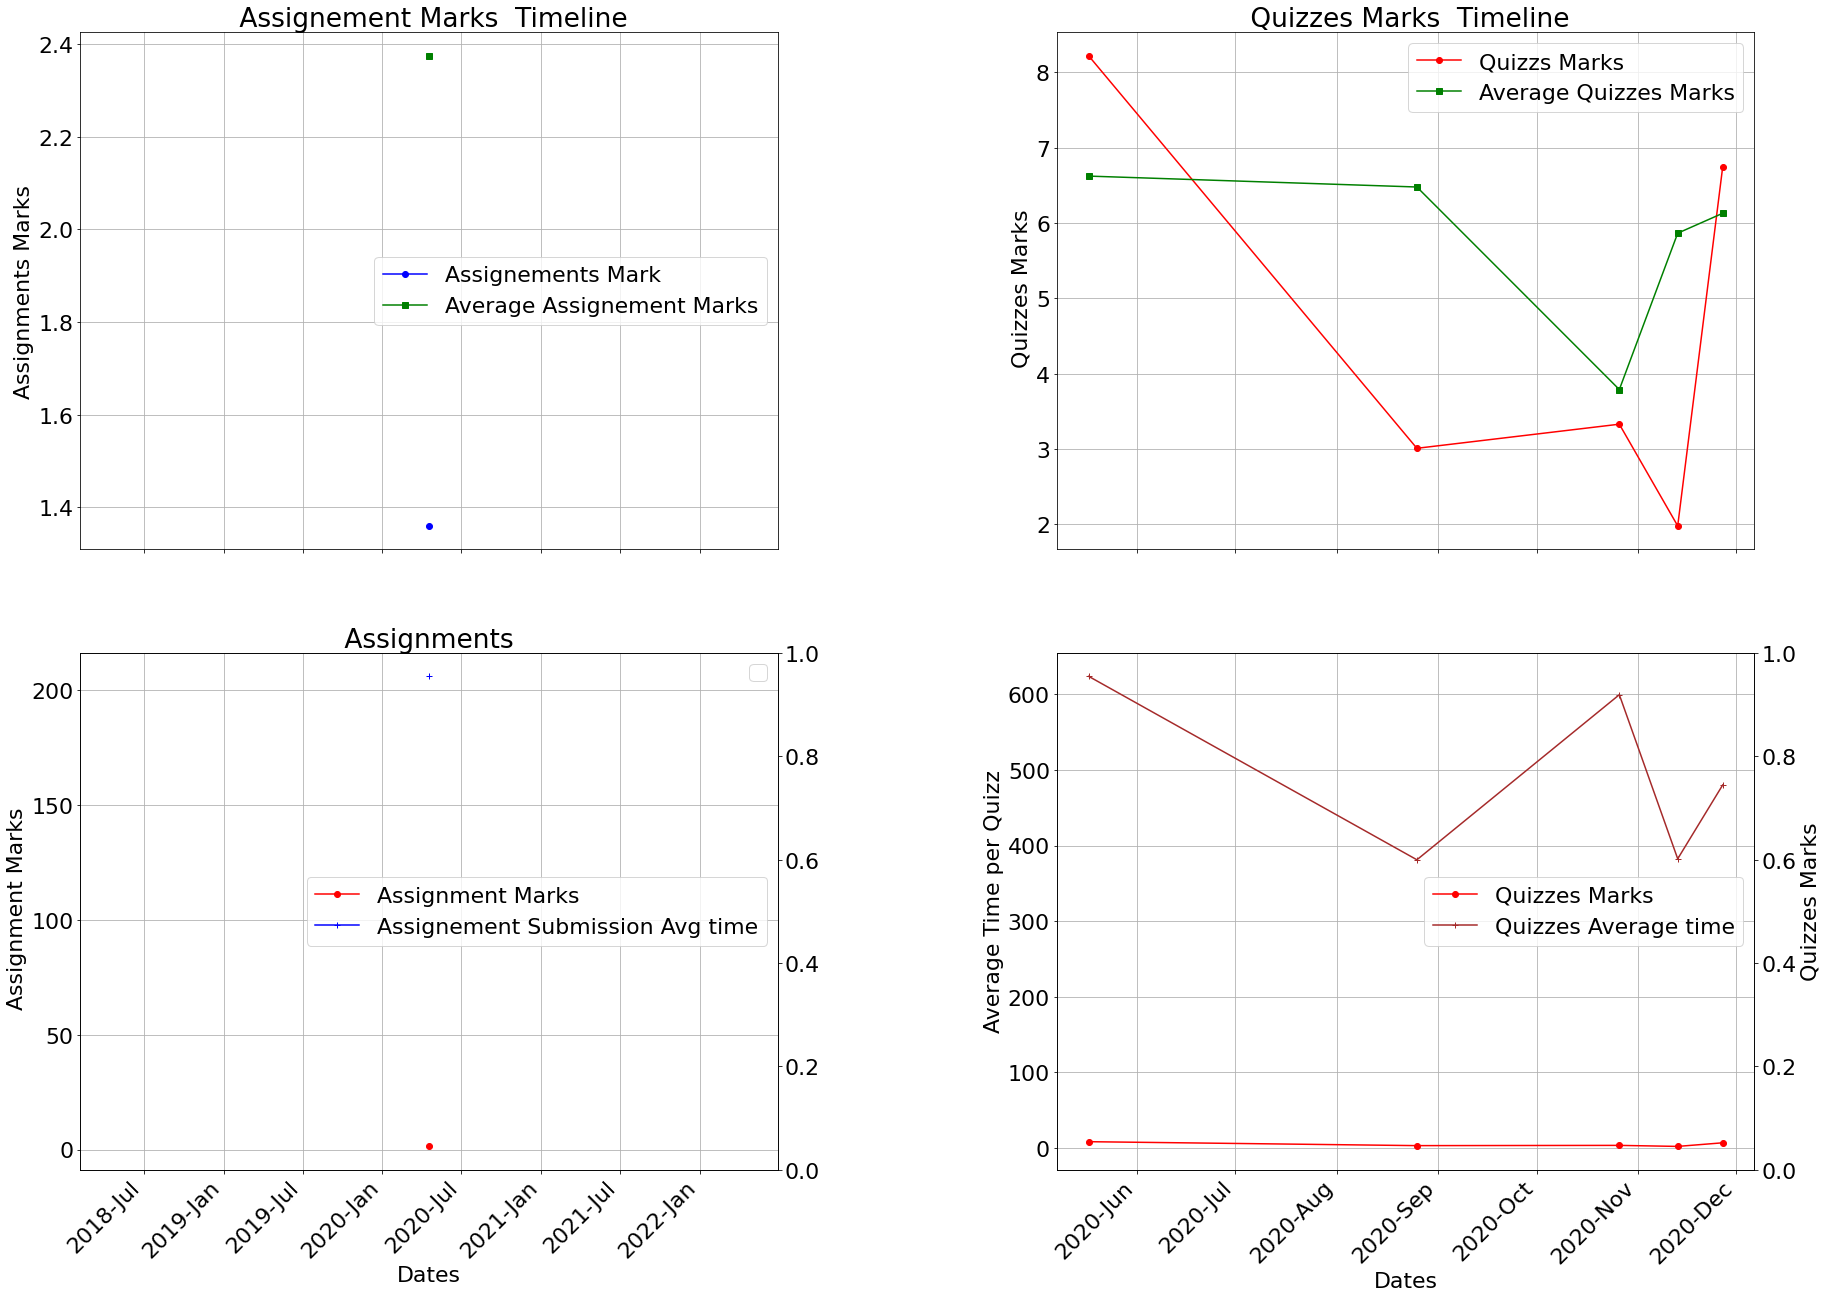

In [ ]:
#  NUmber of Assignments is less then Quizzes
plt.rcParams.update({'font.size': 22})
#plt.subplots_adjust(top = 0.99, bottom=0.01, wspace=0.4)

# plt.setp(axes, xticks=[0.1, 0.5, 0.9], xticklabels=['a', 'b', 'c'],
#         yticks=[1, 2, 3])
# plt.sca(axes[1, 1])
# plt.xticks(range(3), ['A', 'Big', 'Cat'], color='red')


fig, ax=plt.subplots(2, 2, figsize=(30,20), sharex=False )
plt.subplots_adjust(top = 0.99, bottom=0.01, wspace=0.4)


df_plt[df_plt.Activity_type==1]["Act_mark"].plot( subplots=True,marker="o",    ax=ax[0, 0] , color="blue", label="Assignements Mark")
df_plt[df_plt.Activity_type==1]["Act_mark_avg"].plot( subplots=True, marker="s",   ax=ax[0,0] , color="green", label="Average Assignement Marks" )

df_plt[df_plt.Activity_type==0]["Act_mark"].plot( subplots=True, marker="o",   ax=ax[0,1] , color="red", label="Quizzs Marks" )
df_plt[df_plt.Activity_type==0]["Act_mark_avg"].plot( subplots=True, marker="s",   ax=ax[0,1] , color="green", label="Average Quizzes Marks" )
# add time Avg per Activity

ax4=ax[1,1].twinx()
df_plt[df_plt.Activity_type==0]["Act_mark"].plot( subplots=True, marker="o",   ax=ax[1,1] , color="red", label="Quizzes Marks" )

df_plt[df_plt.Activity_type==0]["Act_time_avg"].plot( subplots=True, marker="+",   ax=ax[1,1] , color="brown", label="Quizzes Average time" )


ax3=ax[1,0].twinx()
df_plt[df_plt.Activity_type==1]["Act_mark"].plot( subplots=True, marker="o",   ax=ax[1,0] , color="red", label="Assignment Marks" )
df_plt[df_plt.Activity_type==1]["Act_time_avg"].plot( subplots=True,marker="+",    ax=ax[1, 0] , color="blue", label="Assignement Submission Avg time")



plt.legend()
# Set title and labels for axes
ax[0,0].set(xlabel="Dates",
       ylabel="Assignments Marks",
       title=" Assignement Marks  Timeline")
fig.autofmt_xdate(rotation=45)
ax[0,0].xaxis.set_major_formatter(DateFormatter("%Y-%b"))
# ---------------------------------------------

ax[0,1].set(xlabel="Dates",
       ylabel=" Quizzes Marks",
       title=" Quizzes Marks  Timeline")
ax4.set(xlabel="Dates",
       ylabel="   Quizzes Marks",
       )
ax[1,1].set(xlabel="Dates",
       ylabel="   Average Time per Quizz"
       )

ax[1,0].set(xlabel="Dates",
       ylabel=" Assignment Marks",
       title=" Assignments ")

fig.autofmt_xdate(rotation=45)

ax[0,0].grid()
ax[0,1].grid()
ax[1,0].grid()
ax[1,1].grid()
ax[1,1].xaxis.set_major_formatter(DateFormatter("%Y-%b"))
ax[1,0].xaxis.set_major_formatter(DateFormatter("%Y-%b"))

  #---------------------------------------
ax[0,0].legend()
ax[0,1].legend()
ax[1,0].legend()
ax[1,1].legend()

In [ ]:
df_plt.reset_index(inplace=True)
df_plt.head()

,Act_submit_Time,Course_code,Activity_type,Activity_id,Act_diff,Act_cp,Act_time,Act_mark,Act_cp_avg,Act_diff_avg,Act_mark_avg,Act_time_avg
0,2020-10-26 06:20:39,g7_2,0,g7_2-Act_13,2,2,857,3.33,1.500000,2.250000,3.790000,599.500000
1,2020-04-17 17:16:33,g7_2,1,g7_2-Act_5,4,2,30,1.36,2.000000,3.500000,2.375000,206.000000
2,2020-11-13 02:04:14,g7_1,0,g7_1-Act_5,2,1,45,1.98,1.666667,2.555556,5.865556,382.444444
3,2020-05-17 06:04:31,g7_5,0,g7_5-Act_20,2,1,603,8.22,1.500000,2.333333,6.623333,623.833333
4,2020-08-25 11:09:01,g7_3,0,g7_3-Act_3,1,2,101,3.01,1.571429,2.571429,6.478571,381.142857


In [ ]:
import plotly.express as px

#df = px.data.gapminder().query("continent=='Oceania'")

fig= px.line(df_plt.sort_values(by="Act_submit_Time"), 
             x="Act_submit_Time", y="Act_mark"  , title="Comparision between the student's mark (LINE) and the average of all students marks (BAR)", 
             labels ={"mark": "Act_mark" , "submit_Time" :"Act_submit_Time" } , 
             color_discrete_map={
                 "Act_mark": "r"               
             })
fig1= px.bar(df_plt.sort_values(by="Act_submit_Time"),  labels= {"Act_submit_Time" :"Time" },
             x="Act_submit_Time", y="Act_mark_avg" , title="Comparision between the student's mark and the average of all students marks" ,      
              )
fig.add_trace(fig1.data[0])
#fig.update_layout(legend_title_text='Trend')



fig.update_traces(  hovertemplate=None)
fig.update_layout(hovermode="x" )


fig['data'][0]['showlegend']=True
fig['data'][0]['name']="Student's mark"

fig['data'][1]['showlegend']=True
fig['data'][1]['name']="Average Mark"

fig.show()




ddddffg## Pipeline    SGBRegressor  Mark Prediction 
![](https://i.ibb.co/xzWVv5H/pipe-Lasso.png)

In [ ]:
#df_mg=pd.read_csv("./Data/MarkPrediction.csv", index_col=0)

In [ ]:
df_mg.head(10)

,student_ID,Course_code,Activity_type,Std_act_cp_mean,Std_act_d_mean,Std_act_m_count,Std_act_m_max,Std_act_m_mean,Std_act_m_std,Std_act_t_max,Std_act_t_mean,Std_act_t_std,Act_score,Act_cp_mean,Act_diff_mean,Act_mark_count,Act_mark_max,Act_mark_mean,Act_mark_min,Act_time_max,Act_time_mean,Act_time_min,Activities_Count_<lambda>,last_mark
0,060102878,g9_1,1,1.60,2.6,5,6.67,4.8420,2.077997,821,596.8,285.493783,17.248636,1.608108,2.608108,74,9.84,5.133243,0.12,899.0,486.662162,36.0,20,6.36
1,060247620,g9_1,1,2.00,2.0,2,7.73,4.6900,4.299209,509,350.5,224.152850,23.753662,1.608108,2.608108,74,9.84,5.133243,0.12,899.0,486.662162,36.0,20,7.73
2,060265233,g9_1,1,1.00,2.0,1,0.12,0.1200,0.000000,807,807.0,0.000000,0.166355,1.608108,2.608108,74,9.84,5.133243,0.12,899.0,486.662162,36.0,20,0.12
3,060271117,g9_1,1,2.00,1.5,2,9.80,6.1750,5.126524,443,258.0,261.629509,27.115999,1.608108,2.608108,74,9.84,5.133243,0.12,899.0,486.662162,36.0,20,9.80
4,060312788,g9_1,1,1.00,3.0,1,6.90,6.9000,0.000000,630,630.0,0.000000,11.105122,1.608108,2.608108,74,9.84,5.133243,0.12,899.0,486.662162,36.0,20,6.90
5,060354041,g9_1,1,1.00,2.5,2,9.84,8.6050,1.746554,761,719.0,59.396970,17.069378,1.608108,2.608108,74,9.84,5.133243,0.12,899.0,486.662162,36.0,20,7.37
6,060371981,g9_1,1,1.00,4.0,1,5.97,5.9700,0.000000,90,90.0,0.000000,10.696804,1.608108,2.608108,74,9.84,5.133243,0.12,899.0,486.662162,36.0,20,5.97
7,060373843,g9_1,1,1.75,1.5,4,7.55,4.9125,2.977677,899,368.5,357.460021,20.915095,1.608108,2.608108,74,9.84,5.133243,0.12,899.0,486.662162,36.0,20,3.10
8,060416323,g9_1,1,1.00,3.5,2,8.87,6.8900,2.800143,126,110.0,22.627417,19.764582,1.608108,2.608108,74,9.84,5.133243,0.12,899.0,486.662162,36.0,20,4.91
9,060466685,g9_1,1,2.00,1.0,1,5.81,5.8100,0.000000,555,555.0,0.000000,8.054370,1.608108,2.608108,74,9.84,5.133243,0.12,899.0,486.662162,36.0,20,5.81


In [ ]:
# df_mg.drop("student_ID", axis=1, inplace= True)  # Drop Student_ID
df_mg.set_index("student_ID", inplace=True)

In [ ]:
# Split Data
X=df_mg.iloc[:,:-1]
y=df_mg.iloc[:, -1]

In [ ]:

from sklearn.model_selection import train_test_split

# X_train, X_test = train_test_split(df[df.grade=="6"], test_size=0.3, random_state=42, shuffle=True)

X_train, X_test, y_train, y_test=train_test_split(X, y  , test_size=.3,   random_state=42)

In [ ]:
X.keys()

Index(['Course_code', 'Activity_type', 'Std_act_cp_mean', 'Std_act_d_mean',
       'Std_act_m_count', 'Std_act_m_max', 'Std_act_m_mean', 'Std_act_m_std',
       'Std_act_t_max', 'Std_act_t_mean', 'Std_act_t_std', 'Act_score',
       'Act_cp_mean', 'Act_diff_mean', 'Act_mark_count', 'Act_mark_max',
       'Act_mark_mean', 'Act_mark_min', 'Act_time_max', 'Act_time_mean',
       'Act_time_min', 'Activities_Count_<lambda>'],
      dtype='object')

In [ ]:
X_train.shape, X_test.shape

((3087, 22), (1323, 22))

In [ ]:
from sklearn.preprocessing import StandardScaler , OneHotEncoder
from sklearn.compose import make_column_transformer , make_column_selector  as selector

from sklearn.pipeline import make_pipeline
  
num_pipeline= make_pipeline(
     StandardScaler( )    # Rescaling
)

cat_pipeline= make_pipeline(
      
     #OneHotEncoder(  sparse=False ,handle_unknown = 'ignore'),
     OneHotEncoder(drop="if_binary" , sparse=False ), 
 
)

In [ ]:
#  Pipeline structure 
preprocess= make_column_transformer(
     ( num_pipeline,  selector(dtype_include="number") ),  #Numeric feature rescaling
     (cat_pipeline, selector(dtype_exclude="number"))  # Categorical features Encoding
     )

In [ ]:
preprocess.fit_transform(X_train).shape

(3087, 75)

In [ ]:
#df.select_dtypes(exclude="number").shape

In [ ]:
preprocess.fit_transform(X_train)[0]

array([-0.04203688,  0.56393193,  0.10662716, -1.2360755 , -1.39063936,
        0.07565196,  0.38030588,  0.53283434, -0.02519746, -0.65133083,
       -0.41600331, -0.65931878,  1.85273946,  0.84019783,  0.95642875,
       -0.54711908,  0.75153992,  0.11121847, -0.68715718,  0.59547829,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [ ]:
# pipelline Model
from xgboost import XGBRegressor
pipe_reg= make_pipeline(
    preprocess, 
    XGBRegressor(objective="reg:squarederror")
    )

In [ ]:
pipe_reg.get_params()

{'columntransformer': ColumnTransformer(transformers=[('pipeline-1',
                                  Pipeline(steps=[('standardscaler',
                                                   StandardScaler())]),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fde5de56450>),
                                 ('pipeline-2',
                                  Pipeline(steps=[('onehotencoder',
                                                   OneHotEncoder(drop='if_binary',
                                                                 sparse=False))]),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fde5de56490>)]),
 'columntransformer__n_jobs': None,
 'columntransformer__pipeline-1': Pipeline(steps=[('standardscaler', StandardScaler())]),
 'columntransformer__pipeline-1__memory': None,
 'columntransformer__pipeline-1__standardscaler': StandardScaler(),
 'columntransformer__pip

In [ ]:
# hyper parameters

param_grid={
    "xgbregressor__learning_rate": [0.01, 0.1],
    "xgbregressor__max_depth" : [3,5,7, 10] ,
    "xgbregressor__min_child_weight" :[1,3,5],
    "xgbregressor__subsample": [0.5, 0.7],
    "xgbregressor__colsample_bytree": [0.5, 0.7],
    "xgbregressor__n_estimators": [200, 400, 1000]
    
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, KFold

kf= KFold( n_splits=5, shuffle=True )
gs= RandomizedSearchCV( pipe_reg, param_distributions=param_grid,  scoring="neg_mean_squared_error", cv=kf,verbose=3)

In [ ]:
gs.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END xgbregressor__colsample_bytree=0.7, xgbregressor__learning_rate=0.01, xgbregressor__max_depth=10, xgbregressor__min_child_weight=1, xgbregressor__n_estimators=200, xgbregressor__subsample=0.7;, score=-3.401 total time=   3.1s
[CV 2/5] END xgbregressor__colsample_bytree=0.7, xgbregressor__learning_rate=0.01, xgbregressor__max_depth=10, xgbregressor__min_child_weight=1, xgbregressor__n_estimators=200, xgbregressor__subsample=0.7;, score=-3.342 total time=   3.0s
[CV 3/5] END xgbregressor__colsample_bytree=0.7, xgbregressor__learning_rate=0.01, xgbregressor__max_depth=10, xgbregressor__min_child_weight=1, xgbregressor__n_estimators=200, xgbregressor__subsample=0.7;, score=-3.243 total time=   3.0s
[CV 4/5] END xgbregressor__colsample_bytree=0.7, xgbregressor__learning_rate=0.01, xgbregressor__max_depth=10, xgbregressor__min_child_weight=1, xgbregressor__n_estimators=200, xgbregressor__subsample=0.7;, score=-3.435 to

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('pipeline-1',
                                                                               Pipeline(steps=[('standardscaler',
                                                                                                StandardScaler())]),
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x7fde5de56450>),
                                                                              ('pipeline-2',
                                                                               Pipeline(steps=[('onehotencoder',
                                                                                                One...
                                              XGBRegressor(ob

In [ ]:
gs.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fde55088c50>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fde55088bd0>)])),
                ('xgbregressor',
                 XGBRegressor(colsample_bytree=0.5, learning_rate=0.01,

In [ ]:
gs.best_params_

{'xgbregressor__colsample_bytree': 0.5,
 'xgbregressor__learning_rate': 0.01,
 'xgbregressor__max_depth': 5,
 'xgbregressor__min_child_weight': 1,
 'xgbregressor__n_estimators': 400,
 'xgbregressor__subsample': 0.7}

In [ ]:
X_test.sample()

,Course_code,Activity_type,Std_act_cp_mean,Std_act_d_mean,Std_act_m_count,Std_act_m_max,Std_act_m_mean,Std_act_m_std,Std_act_t_max,Std_act_t_mean,Std_act_t_std,Act_score,Act_cp_mean,Act_diff_mean,Act_mark_count,Act_mark_max,Act_mark_mean,Act_mark_min,Act_time_max,Act_time_mean,Act_time_min,Activities_Count_<lambda>
student_ID,,,,,,,,,,,,,,,,,,,,,,
120637851,g3_5,0,2.0,4.0,1,2.55,2.55,0.0,807,807.0,0.0,5.871592,1.5,2.51087,92,9.96,5.189891,0.08,895.0,432.673913,35.0,20


In [ ]:
std_Pred=X_test.loc["080969613"] 

In [ ]:
gs.predict(X_test.loc["120637851"])

array([6.589831 , 1.7746212, 6.4280024, 5.464899 , 2.664589 ],
      dtype=float32)

In [ ]:
st_pred_graph.head()

,student_ID,Course_code,Activity_type,Std_act_cp_mean,Std_act_d_mean,Std_act_m_count,Std_act_m_last,Std_act_m_max,Std_act_m_mean,Std_act_m_std,Std_act_t_max,Std_act_t_mean,Std_act_t_std,Act_score,Act_cp_mean,Act_diff_mean,Act_mark_count,Act_mark_max,Act_mark_mean,Act_mark_min,Act_time_max,Act_time_mean,Act_time_min,Activities_Count_<lambda>
1055,080969613,g7_1,0,1.0,2.0,1,1.98,1.98,1.980,0.000000,45,45.0,0.000000,2.744863,1.603774,2.547170,106,9.85,5.196887,0.20,896.0,456.311321,33.0,20
1101,080969613,g7_2,0,2.0,2.0,1,3.33,3.33,3.330,0.000000,857,857.0,0.000000,5.966559,1.541176,2.423529,85,9.98,4.154706,0.01,888.0,473.058824,30.0,20
1146,080969613,g7_2,1,2.0,4.0,2,8.05,8.05,4.705,4.730544,41,35.5,7.778175,31.925516,1.609756,2.524390,82,9.92,4.933902,0.08,894.0,483.756098,30.0,20
1190,080969613,g7_3,0,2.0,1.0,1,3.01,3.01,3.010,0.000000,101,101.0,0.000000,4.172746,1.462500,2.525000,80,9.98,5.003375,0.04,896.0,456.562500,44.0,20
1368,080969613,g7_5,0,1.0,2.0,1,8.22,8.22,8.220,0.000000,603,603.0,0.000000,11.395340,1.524390,2.609756,82,9.81,5.517927,0.10,897.0,489.317073,31.0,20


In [ ]:
std_Pred["Predicted_mark"]=gs.predict(X_test.loc["120637851"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
std_Pred

,Course_code,Activity_type,Std_act_cp_mean,Std_act_d_mean,Std_act_m_count,Std_act_m_max,Std_act_m_mean,Std_act_m_std,Std_act_t_max,Std_act_t_mean,Std_act_t_std,Act_score,Act_cp_mean,Act_diff_mean,Act_mark_count,Act_mark_max,Act_mark_mean,Act_mark_min,Act_time_max,Act_time_mean,Act_time_min,Activities_Count_<lambda>,Predicted_mark
student_ID,,,,,,,,,,,,,,,,,,,,,,,
070792498,g8_1,1,2.000000,2.500000,2,7.78,6.520000,1.781909,355,212.0,202.232539,18.918902,1.454545,2.386364,88,9.99,5.100795,0.04,893.0,428.306818,53.0,18,6.240846
070792498,g8_6,1,1.400000,2.600000,5,9.86,4.538000,4.351531,898,708.0,185.788859,38.055937,1.494253,2.425287,87,9.99,5.437126,0.20,898.0,468.275862,37.0,20,4.666232
070792498,g8_1,0,1.666667,1.666667,3,7.65,3.833333,3.386065,842,552.0,407.573306,25.469487,1.531915,2.404255,94,9.61,4.986596,0.02,883.0,495.478723,57.0,20,3.608995


In [ ]:
y_pred=gs.predict(X_test)

In [ ]:
from sklearn import  metrics
print(f"  MAE : { metrics.mean_absolute_error(y_test, y_pred):.3f}")
print(f"  MSE : { metrics.mean_squared_error(y_test, y_pred):.3f}")
print(f"  RMSE : { np.sqrt(metrics.mean_squared_error(y_test, y_pred)):.3f}")
print(f"  R^2 : { metrics.r2_score(y_test, y_pred):.3f}")
print(f"  Explained Variance Score : { metrics.mean_absolute_error(y_test, y_pred):.3f}")

  MAE : 1.108
  MSE : 3.092
  RMSE : 1.759
  R^2 : 0.652
  Explained Variance Score : 1.108


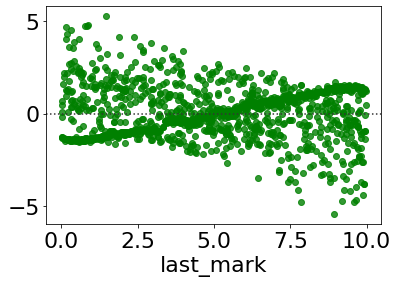

In [ ]:
# Residual Plot
import seaborn as sns
_= sns.residplot(x=y_test, y=y_pred, color="green")

In [ ]:
X_test.shape

(1327, 22)

In [ ]:
X_test.sample()

,Course_code,Activity_type,Std_act_cp_mean,Std_act_d_mean,Std_act_m_count,Std_act_m_max,Std_act_m_mean,Std_act_m_std,Std_act_t_max,Std_act_t_mean,Std_act_t_std,Act_score,Act_cp_mean,Act_diff_mean,Act_mark_count,Act_mark_max,Act_mark_mean,Act_mark_min,Act_time_max,Act_time_mean,Act_time_min,Activities_Count_<lambda>
student_ID,,,,,,,,,,,,,,,,,,,,,,
060720135,g9_3,0,1.0,4.0,1,9.91,9.91,0.0,414,414.0,0.0,17.756336,1.478873,2.690141,71,9.91,5.002394,0.04,878.0,499.042254,31.0,20


In [ ]:
df_avt.sample()

,student_ID,Course_code,Activity_id,Activity_type,Act_diff,Act_cp,Act_time,Act_mark
Act_submit_Time,,,,,,,,
2020-05-04 14:57:11,110986052,g4_5,g4_5-Act_16,1,4,2,470,0.37


In [ ]:
df_avt.keys()

Index(['student_ID', 'Course_code', 'Activity_id', 'Activity_type', 'Act_diff',
       'Act_cp', 'Act_time', 'Act_mark'],
      dtype='object')

In [ ]:
X_test.keys()

Index(['Course_code', 'Activity_type', 'Std_act_cp_mean', 'Std_act_d_mean',
       'Std_act_m_count', 'Std_act_m_max', 'Std_act_m_mean', 'Std_act_m_std',
       'Std_act_t_max', 'Std_act_t_mean', 'Std_act_t_std', 'Act_score',
       'Act_cp_mean', 'Act_diff_mean', 'Act_mark_count', 'Act_mark_max',
       'Act_mark_mean', 'Act_mark_min', 'Act_time_max', 'Act_time_mean',
       'Act_time_min', 'Activities_Count_<lambda>'],
      dtype='object')

In [ ]:
#  Last Mark Comparaison
pd.DataFrame({"Actual Mark": y_test, "Predicted Mark": y_pred}).sample(6)

,Actual Mark,Predicted Mark
student_ID,,
081105178,5.47,5.570853
070550796,0.45,0.554962
131274196,6.24,6.281132
090343102,9.08,8.756810
130659120,9.45,7.272192
100319068,4.25,4.035170


In [ ]:
X_test["predicted_Mark"]=y_pred

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
X_test=X_test.reindex()

In [ ]:
X_test.student_ID=="120405564"

student_ID
140286938    False
120605077    False
100115512    False
110745570    False
110810510    False
             ...  
070285557    False
060860198    False
081063216    False
070424979    False
120594765    False
Name: student_ID, Length: 1327, dtype: bool

In [ ]:
#X_test["student_ID"]=120405564
X_test.loc[X_test['student_ID'] =="120405564"]


,Course_code,Activity_type,Std_act_cp_mean,Std_act_d_mean,Std_act_m_count,Std_act_m_max,Std_act_m_mean,Std_act_m_std,Std_act_t_max,Std_act_t_mean,Std_act_t_std,Act_score,Act_cp_mean,Act_diff_mean,Act_mark_count,Act_mark_max,Act_mark_mean,Act_mark_min,Act_time_max,Act_time_mean,Act_time_min,Activities_Count_<lambda>,predicted_Mark,student_ID
student_ID,,,,,,,,,,,,,,,,,,,,,,,,


In [ ]:
To show the predicted value on the graph


import plotly.express as px

#df = px.data.gapminder().query("continent=='Oceania'")

fig= px.line(df_plt.sort_values(by="Act_submit_Time"), 
             x="Act_submit_Time", y="Act_mark"  , title="Comparision between the student's mark (LINE) and the average of all students marks (BAR)", 
             labels ={"mark": "Act_mark" , "submit_Time" :"Act_submit_Time" } , 
             color_discrete_map={
                 "Act_mark": "blue"               
             })
fig1= px.bar(df_plt.sort_values(by="Act_submit_Time"),  labels= {"Act_submit_Time" :"Time" },
             x="Act_submit_Time", y="Act_mark_avg" , title="Comparision between the student's mark and the average of all students marks" ,      
              )
fig.add_trace(fig1.data[0])
#fig.update_layout(legend_title_text='Trend')



fig.update_traces(  hovertemplate=None)
fig.update_layout(hovermode="x" )


fig['data'][0]['showlegend']=True
fig['data'][0]['name']="Student's mark"

fig['data'][1]['showlegend']=True
fig['data'][1]['name']="Average Mark"

fig.show()




## Pipeline    SGBClasssifier  Classification  Prediction 
![](https://i.ibb.co/xzWVv5H/pipe-Lasso.png)

In [ ]:
#df_stClass=pd.read_csv("./Data/MarkPrediction.csv", index_col=0)
df_stClass= df_mg

In [ ]:
df_stClass.head()

,Course_code,Activity_type,Std_act_cp_mean,Std_act_d_mean,Std_act_m_count,Std_act_m_max,Std_act_m_mean,Std_act_m_std,Std_act_t_max,Std_act_t_mean,Std_act_t_std,Act_score,Act_cp_mean,Act_diff_mean,Act_mark_count,Act_mark_max,Act_mark_mean,Act_mark_min,Act_time_max,Act_time_mean,Act_time_min,Activities_Count_<lambda>,last_mark
student_ID,,,,,,,,,,,,,,,,,,,,,,,
060111824,g9_2,0,1.0,2.666667,3,7.41,6.366667,1.070996,159,99.0,61.024585,14.338325,1.5,2.518519,54,9.89,5.48463,0.0,283.0,148.62963,31.0,19,6.42
060135804,g9_2,0,2.0,4.000000,1,4.29,4.290000,0.000000,95,95.0,0.000000,9.878090,1.5,2.518519,54,9.89,5.48463,0.0,283.0,148.62963,31.0,19,4.29
060181433,g9_2,0,1.0,4.000000,1,0.96,0.960000,0.000000,110,110.0,0.000000,1.720089,1.5,2.518519,54,9.89,5.48463,0.0,283.0,148.62963,31.0,19,0.96
060211105,g9_2,0,2.0,4.000000,1,0.22,0.220000,0.000000,46,46.0,0.000000,0.506569,1.5,2.518519,54,9.89,5.48463,0.0,283.0,148.62963,31.0,19,0.22
060218034,g9_2,0,2.0,4.000000,1,9.43,9.430000,0.000000,93,93.0,0.000000,21.713377,1.5,2.518519,54,9.89,5.48463,0.0,283.0,148.62963,31.0,19,9.43


In [ ]:
#df_mg.reset_index()
# df_mg.drop("student_ID", axis=1, inplace= True)  # Drop Student_ID
# df_stClass.set_index("student_ID", inplace=True)

- Ranking

$$\Large score=\log(\frac{\text{Qz_Max_time}}{\text{Qz_Avg_tim}}+\text{Qz_avg_diff*Qz_Avg_cp})*\frac{\text{Qz_Avg_mark}^2}{\text{Qz_Max_mark}}$$

In [ ]:
df_stClass.Act_score.describe().T

count    4373.000000
mean       13.935535
std         8.621868
min         0.013863
25%         7.315894
50%        13.158862
75%        19.246492
max        45.445302
Name: Act_score, dtype: float64

In [ ]:
df_stClass.Act_score.quantile(0.25)

7.315894232570133

In [ ]:
#  feature  Engineering

bins = [0, 
        df_stClass.Act_score.quantile(0.25),
        df_stClass.Act_score.quantile(0.5),
        df_stClass.Act_score.quantile(0.75), 
        df_stClass.Act_score.quantile(1)]
names = ['D', 'C', 'B', 'A']

df_stClass['Score_Class'] = pd.cut(df_stClass.Act_score,
                           bins, labels=names)

In [ ]:
df_stClass.head()

#  It's better to add data related to  timestamp feature:  dat, month, dayofteweek, monthOfTheyear .....

,Course_code,Activity_type,Std_act_cp_mean,Std_act_d_mean,Std_act_m_count,Std_act_m_max,Std_act_m_mean,Std_act_m_std,Std_act_t_max,Std_act_t_mean,Std_act_t_std,Act_score,index,Act_cp_mean,Act_diff_mean,Act_mark_count,Act_mark_max,Act_mark_mean,Act_mark_min,Act_time_max,Act_time_mean,Act_time_min,Activities_Count_<lambda>,last_mark,Score_Class
student_ID,,,,,,,,,,,,,,,,,,,,,,,,,
060102727,g9_2,0,1.000000,2.000000,2,7.19,6.815000,0.530330,194,172.000000,31.112698,10.754689,98,1.449275,2.492754,69,9.98,4.676232,0.12,286.0,164.318841,30.0,20,6.44,C
060106025,g9_2,0,1.666667,1.666667,3,6.51,3.930000,2.335530,247,160.000000,81.663946,18.027831,98,1.449275,2.492754,69,9.98,4.676232,0.12,286.0,164.318841,30.0,20,1.96,B
060135590,g9_2,0,1.000000,2.000000,1,0.50,0.500000,0.000000,48,48.000000,0.000000,0.693147,98,1.449275,2.492754,69,9.98,4.676232,0.12,286.0,164.318841,30.0,20,0.50,D
060181122,g9_2,0,1.000000,3.250000,4,7.35,4.210000,3.547647,249,181.000000,52.249402,22.165184,98,1.449275,2.492754,69,9.98,4.676232,0.12,286.0,164.318841,30.0,20,7.35,A
060215085,g9_2,0,1.666667,2.666667,3,5.35,3.906667,2.010730,198,138.333333,80.326417,14.125670,98,1.449275,2.492754,69,9.98,4.676232,0.12,286.0,164.318841,30.0,20,1.61,B


In [ ]:
df_stClass.drop("Act_score", axis=1, inplace=True)

In [ ]:
# Split Data
X=df_stClass.iloc[:,:-1]
y=df_stClass["Score_Class"]

In [ ]:

from sklearn.model_selection import train_test_split

# X_train, X_test = train_test_split(df[df.grade=="6"], test_size=0.3, random_state=42, shuffle=True)

X_train, X_test, y_train, y_test=train_test_split(X, y  , test_size=.3,   random_state=42)

In [ ]:
X_train.shape, X_test.shape

((3061, 23), (1313, 23))

In [ ]:
from sklearn.preprocessing import StandardScaler , OneHotEncoder
from sklearn.compose import make_column_transformer , make_column_selector  as selector

from sklearn.pipeline import make_pipeline
  
num_pipeline= make_pipeline(
     StandardScaler( )    # Rescaling
)

cat_pipeline= make_pipeline(
      
     #OneHotEncoder(  sparse=False ,handle_unknown = 'ignore'),
     OneHotEncoder(drop="if_binary" , sparse=False ), 
 
)

In [ ]:
#  Pipeline structure 
preprocess= make_column_transformer(
     ( num_pipeline,  selector(dtype_include="number") ),  #Numeric feature rescaling
     (cat_pipeline, selector(dtype_exclude="number"))  # Categorical features Encoding
     )

In [ ]:
preprocess.fit_transform(X_train).shape

(3061, 76)

In [ ]:
#df.select_dtypes(exclude="number").shape

In [ ]:
preprocess.fit_transform(X_train)[0]

array([-1.20193045, -1.59553814, -0.83479981,  1.42016022,  2.07144549,
       -0.79564025, -1.43523365, -1.19288422, -0.80289205,  0.22279288,
       -1.33635001,  0.39772246,  1.68444608,  0.93384567, -1.70949803,
       -0.57564473, -1.79561765, -0.31878069,  0.65854273,  0.6072636 ,
        1.71943514,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [ ]:
# pipelline Model
from xgboost import XGBClassifier
pipe_reg= make_pipeline(
    preprocess, 
    XGBClassifier()
    )

In [ ]:
pipe_reg.get_params()

{'columntransformer': ColumnTransformer(transformers=[('pipeline-1',
                                  Pipeline(steps=[('standardscaler',
                                                   StandardScaler())]),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f70bdf1b910>),
                                 ('pipeline-2',
                                  Pipeline(steps=[('onehotencoder',
                                                   OneHotEncoder(drop='if_binary',
                                                                 sparse=False))]),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f70bdf1b110>)]),
 'columntransformer__n_jobs': None,
 'columntransformer__pipeline-1': Pipeline(steps=[('standardscaler', StandardScaler())]),
 'columntransformer__pipeline-1__memory': None,
 'columntransformer__pipeline-1__standardscaler': StandardScaler(),
 'columntransformer__pip

In [ ]:
# hyper parameters

param_grid = {
    'xgbclassifier__n_estimators': [50, 100, 150, 200],
    'xgbclassifier__learning_rate': [0.01, 0.1, 0.2, 0.3],
    'xgbclassifier__max_depth': range(3, 5),
    'xgbclassifier__colsample_bytree': [i/10.0 for i in range(1, 3)],
    'xgbclassifier__gamma': [i/10.0 for i in range(3)],
    # 'pca__n_components':[40, 60, 80]

}

In [ ]:
# AUC and accuracy as score
from sklearn.metrics import accuracy_score, make_scorer, f1_score
scoring = make_scorer(f1_score(average='micro'))

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-316-50ccf65f4534>", line 3, in <module>
    scoring = make_scorer(f1_score(average='micro'))
  File "/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
TypeError: f1_score() missing 2 required positional arguments: 'y_true' and 'y_pred'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 1823, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'TypeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/I

TypeError: ignored

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, KFold

kf= KFold( n_splits=5, shuffle=True )
gs= RandomizedSearchCV( pipe_reg, param_distributions=param_grid,  scoring="scoring",  cv=kf,verbose=3)

In [ ]:
gs.fit(X_train, y_train)

In [ ]:
gs.best_estimator_

In [ ]:
gs.best_params_

In [ ]:
X_test.sample()

In [ ]:
std_Pred=X_test.loc["120512419"]

In [ ]:
gs.predict(X_test.loc["120512419"])

In [ ]:
std_Pred["Predicted_mark"]=gs.predict(X_test.loc["120512419"])

In [ ]:
std_Pred

In [ ]:
y_pred=gs.predict(X_test)

In [ ]:
from sklearn import  metrics
print(f"  MAE : { metrics.mean_absolute_error(y_test, y_pred):.3f}")
print(f"  MSE : { metrics.mean_squared_error(y_test, y_pred):.3f}")
print(f"  RMSE : { np.sqrt(metrics.mean_squared_error(y_test, y_pred)):.3f}")
print(f"  R^2 : { metrics.r2_score(y_test, y_pred):.3f}")
print(f"  Explained Variance Score : { metrics.mean_absolute_error(y_test, y_pred):.3f}")

In [ ]:
# Residual Plot
import seaborn as sns
_= sns.residplot(x=y_test, y=y_pred, color="green")

In [ ]:
X_test.shape

In [ ]:
X_test.sample()

In [ ]:
df_avt.sample()

In [ ]:
df_avt.keys()

In [ ]:
X_test.keys()

In [ ]:
#  Last Mark Comparaison
pd.DataFrame({"Actual Mark": y_test, "Predicted Mark": y_pred}).sample(6)

In [ ]:
X_test["predicted_Mark"]=y_pred

In [ ]:
X_test.head()